<a href="https://colab.research.google.com/github/vikoms/Cluster-Assignment/blob/dataset-kecil/DatasetKecil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print(f"===== 📌 Step 1: Mount Google Drive =====")
from google.colab import drive

print("🔄 Sedang mount Google Drive...")
drive.mount('/content/drive')

print("✅ Proses mount Google Drive berhasil.")



===== 📌 Step 1: Mount Google Drive =====
🔄 Sedang mount Google Drive...
Mounted at /content/drive
✅ Proses mount Google Drive berhasil.


In [ ]:
print(f"===== 📌 Step 2: Data Preprocessing & Normalization (CPU) =====")
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

# Path folder di GDrive untuk menyimpan hasil preprocessing
output_dir = '/content/drive/MyDrive/Preprocessed'
os.makedirs(output_dir, exist_ok=True)

# List nama file dataset
dataset_files = [
    'ai_dev_productivity.csv',
    'SalesDataset.csv',
    'Sleep_health_and_lifestyle_dataset.csv',
    'avocado_ripeness_dataset.csv',
    'top_100_saas_companies_2025.csv'
]

# Path folder asal dataset
dataset_path = '/content/drive/MyDrive/Dataset_ML'


# Fungsi preprocessing
def preprocess_dataset(file_name):
    print(f"\n🔧 Memproses dataset: {file_name}")
    try:
        df = pd.read_csv(os.path.join(dataset_path, file_name))

        # Info awal dataset
        print(f"📊 Ukuran awal dataset: {df.shape}")

        # Hapus duplikat
        df = df.drop_duplicates()

        # Tangani missing value: drop kolom jika semua nilai null, isi sisanya
        df.dropna(axis=1, how='all', inplace=True)
        df.fillna(method='ffill', inplace=True)

        # Konversi kategorikal ke numerik (jika ada)
        df = pd.get_dummies(df, drop_first=True)

        # Normalisasi
        scaler = StandardScaler()
        df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

        # Simpan hasil preprocessing
        output_file = os.path.join(output_dir, f"preprocessed_{file_name}")
        df_scaled.to_csv(output_file, index=False)

        print(f"✅ Preprocessing selesai untuk {file_name}")
        print(f"📁 Hasil disimpan di: {output_file}")
        return df_scaled
    except Exception as e:
        print(f"❌ Gagal memproses {file_name}: {e}")
        return None

# Proses semua dataset
processed_datasets = []
for file in dataset_files:
    df_result = preprocess_dataset(file)
    if df_result is not None:
        processed_datasets.append(df_result)


===== 📌 Step 2: Data Preprocessing & Normalization (CPU) =====

🔧 Memproses dataset: ai_dev_productivity.csv
📊 Ukuran awal dataset: (500, 9)


/tmp/ipython-input-3-639793289.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


✅ Preprocessing selesai untuk ai_dev_productivity.csv
📁 Hasil disimpan di: /content/drive/MyDrive/Preprocessed/preprocessed_ai_dev_productivity.csv

🔧 Memproses dataset: SalesDataset.csv
📊 Ukuran awal dataset: (1000, 8)


/tmp/ipython-input-3-639793289.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


✅ Preprocessing selesai untuk SalesDataset.csv
📁 Hasil disimpan di: /content/drive/MyDrive/Preprocessed/preprocessed_SalesDataset.csv

🔧 Memproses dataset: Sleep_health_and_lifestyle_dataset.csv
📊 Ukuran awal dataset: (374, 13)


/tmp/ipython-input-3-639793289.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


✅ Preprocessing selesai untuk Sleep_health_and_lifestyle_dataset.csv
📁 Hasil disimpan di: /content/drive/MyDrive/Preprocessed/preprocessed_Sleep_health_and_lifestyle_dataset.csv

🔧 Memproses dataset: avocado_ripeness_dataset.csv
📊 Ukuran awal dataset: (250, 9)


/tmp/ipython-input-3-639793289.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


✅ Preprocessing selesai untuk avocado_ripeness_dataset.csv
📁 Hasil disimpan di: /content/drive/MyDrive/Preprocessed/preprocessed_avocado_ripeness_dataset.csv

🔧 Memproses dataset: top_100_saas_companies_2025.csv
📊 Ukuran awal dataset: (100, 11)


/tmp/ipython-input-3-639793289.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


✅ Preprocessing selesai untuk top_100_saas_companies_2025.csv
📁 Hasil disimpan di: /content/drive/MyDrive/Preprocessed/preprocessed_top_100_saas_companies_2025.csv


In [ ]:
print(f"===== 📌 Step 3: Verifikasi penggunaan GPU =====")
import torch
import tensorflow as tf
from tensorflow.python.client import device_lib

print("===== 📌 Step 3: Verifikasi GPU Aktif =====")
print("📦 PyTorch GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "Tidak tersedia")

print("📦 TensorFlow Devices:")
print(device_lib.list_local_devices())

if torch.cuda.is_available():
    print("✅ GPU aktif dan siap digunakan (T4 atau lainnya)")
else:
    print("❌ GPU belum aktif, silakan ubah di Runtime > Change Runtime Type > Hardware Accelerator: GPU")


===== 📌 Step 3: Verifikasi penggunaan GPU =====
===== 📌 Step 3: Verifikasi GPU Aktif =====
📦 PyTorch GPU: Tesla T4
📦 TensorFlow Devices:
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3849612108573713579
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14619377664
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13031623719126630740
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]
✅ GPU aktif dan siap digunakan (T4 atau lainnya)


In [ ]:
# 📌 Step 4: Load Dataset yang Sudah Dipreprocessing (dari GDrive)
import pandas as pd
import os

print("===== 📌 Step 4: Load Hasil Preprocessing =====")

# Path folder hasil preprocessing
preprocessed_path = '/content/drive/MyDrive/Preprocessed/'

# List file hasil preprocessing
preprocessed_files = [
    'preprocessed_ai_dev_productivity.csv',
    'preprocessed_SalesDataset.csv',
    'preprocessed_Sleep_health_and_lifestyle_dataset.csv',
    'preprocessed_avocado_ripeness_dataset.csv',
    'preprocessed_top_100_saas_companies_2025.csv'
]

# Dictionary untuk menyimpan semua dataframe
loaded_datasets = {}

# Load setiap file
for file_name in preprocessed_files:
    file_path = os.path.join(preprocessed_path, file_name)
    try:
        df = pd.read_csv(file_path)
        loaded_datasets[file_name] = df
        print(f"✅ Berhasil load: {file_name} | Ukuran: {df.shape}")
    except Exception as e:
        print(f"❌ Gagal load: {file_name} | Error: {e}")


===== 📌 Step 4: Load Hasil Preprocessing =====
✅ Berhasil load: preprocessed_ai_dev_productivity.csv | Ukuran: (500, 9)
✅ Berhasil load: preprocessed_SalesDataset.csv | Ukuran: (1000, 352)
✅ Berhasil load: preprocessed_Sleep_health_and_lifestyle_dataset.csv | Ukuran: (374, 47)
✅ Berhasil load: preprocessed_avocado_ripeness_dataset.csv | Ukuran: (250, 14)
✅ Berhasil load: preprocessed_top_100_saas_companies_2025.csv | Ukuran: (100, 691)


In [ ]:
print("===== 📌 Step 5: Clustering CPU & GPU dengan Jumlah Cluster Optimal =====")

# Import semua yang dibutuhkan
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from cuml.cluster import KMeans as cuKMeans

# Fungsi untuk mencari jumlah cluster optimal berdasarkan silhouette score
def cari_cluster_optimal(X, max_k=10, show_plot=False):
    distortions = []
    silhouette_scores = []
    k_range = range(2, max_k + 1)

    for k in k_range:
        model = KMeans(n_clusters=k, random_state=42)
        labels = model.fit_predict(X)
        distortions.append(model.inertia_)
        silhouette_scores.append(silhouette_score(X, labels))

    if show_plot:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.plot(k_range, distortions, 'bx-')
        plt.title('Elbow Method (Inertia)')
        plt.xlabel('Jumlah Cluster (k)')
        plt.ylabel('Inertia')

        plt.subplot(1, 2, 2)
        plt.plot(k_range, silhouette_scores, 'gx-')
        plt.title('Silhouette Score')
        plt.xlabel('Jumlah Cluster (k)')
        plt.ylabel('Score')
        plt.tight_layout()
        plt.show()

    best_k = silhouette_scores.index(max(silhouette_scores)) + 2
    print(f"✅ K optimal untuk dataset ini: {best_k}")
    return best_k

# ==========================
# Mulai proses clustering
# ==========================

summary_result = []

for file_name, df in loaded_datasets.items():
    print(f"\n🔍 Dataset: {file_name} | Ukuran: {df.shape}")
    X = df.values

    # Cari jumlah cluster optimal (berdasarkan Silhouette Score)
    k_opt = cari_cluster_optimal(X, max_k=10, show_plot=False)

    # ===== Clustering CPU =====
    start_cpu = time.time()
    kmeans_cpu = KMeans(n_clusters=k_opt, random_state=42)
    labels_cpu = kmeans_cpu.fit_predict(X)
    cpu_time = time.time() - start_cpu
    score_cpu = silhouette_score(X, labels_cpu)

    print(f"✅ Clustering CPU selesai | Waktu: {cpu_time:.3f}s | Silhouette Score: {score_cpu:.4f}")

    # ===== Clustering GPU =====
    start_gpu = time.time()
    kmeans_gpu = cuKMeans(n_clusters=k_opt, random_state=42)
    labels_gpu = kmeans_gpu.fit_predict(X)
    gpu_time = time.time() - start_gpu
    score_gpu = silhouette_score(X, labels_gpu)

    print(f"✅ Clustering GPU selesai | Waktu: {gpu_time:.3f}s | Silhouette Score: {score_gpu:.4f}")

    # Simpan hasil ke tabel ringkasan
    summary_result.append({
        "Dataset": file_name,
        "Jumlah Data": df.shape[0],
        "Jumlah Fitur": df.shape[1],
        "K Optimal": k_opt,
        "CPU Time (s)": round(cpu_time, 4),
        "GPU Time (s)": round(gpu_time, 4),
        "CPU Silhouette": round(score_cpu, 4),
        "GPU Silhouette": round(score_gpu, 4)
    })

# ==========================
# Tampilkan tabel hasil akhir
# ==========================
summary_df = pd.DataFrame(summary_result)
print("\n===== 📊 Ringkasan Perbandingan Clustering CPU vs GPU =====")
display(summary_df)


===== 📌 Step 5: Clustering CPU & GPU dengan Jumlah Cluster Optimal =====

🔍 Dataset: preprocessed_ai_dev_productivity.csv | Ukuran: (500, 9)
✅ K optimal untuk dataset ini: 2
✅ Clustering CPU selesai | Waktu: 0.004s | Silhouette Score: 0.2642


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)


✅ Clustering GPU selesai | Waktu: 0.868s | Silhouette Score: 0.2642

🔍 Dataset: preprocessed_SalesDataset.csv | Ukuran: (1000, 352)
✅ K optimal untuk dataset ini: 2
✅ Clustering CPU selesai | Waktu: 0.009s | Silhouette Score: 0.0062
✅ Clustering GPU selesai | Waktu: 0.038s | Silhouette Score: 0.2963

🔍 Dataset: preprocessed_Sleep_health_and_lifestyle_dataset.csv | Ukuran: (374, 47)
✅ K optimal untuk dataset ini: 10
✅ Clustering CPU selesai | Waktu: 0.005s | Silhouette Score: 0.4881


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)


✅ Clustering GPU selesai | Waktu: 0.019s | Silhouette Score: 0.2310

🔍 Dataset: preprocessed_avocado_ripeness_dataset.csv | Ukuran: (250, 14)
✅ K optimal untuk dataset ini: 6
✅ Clustering CPU selesai | Waktu: 0.003s | Silhouette Score: 0.6590
✅ Clustering GPU selesai | Waktu: 0.015s | Silhouette Score: 0.6590

🔍 Dataset: preprocessed_top_100_saas_companies_2025.csv | Ukuran: (100, 691)
✅ K optimal untuk dataset ini: 3
✅ Clustering CPU selesai | Waktu: 0.003s | Silhouette Score: 0.0172
✅ Clustering GPU selesai | Waktu: 0.063s | Silhouette Score: 0.0287

===== 📊 Ringkasan Perbandingan Clustering CPU vs GPU =====


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)


,Dataset,Jumlah Data,Jumlah Fitur,K Optimal,CPU Time (s),GPU Time (s),CPU Silhouette,GPU Silhouette
0,preprocessed_ai_dev_productivity.csv,500,9,2,0.0040,0.8682,0.2642,0.2642
1,preprocessed_SalesDataset.csv,1000,352,2,0.0090,0.0383,0.0062,0.2963
2,preprocessed_Sleep_health_and_lifestyle_datase...,374,47,10,0.0047,0.0188,0.4881,0.2310
3,preprocessed_avocado_ripeness_dataset.csv,250,14,6,0.0030,0.0153,0.6590,0.6590
4,preprocessed_top_100_saas_companies_2025.csv,100,691,3,0.0035,0.0633,0.0172,0.0287


===== 📌 Step 6: Interpretasi + Visualisasi PCA Hasil GPU =====

🔎 Interpretasi Clustering GPU: preprocessed_ai_dev_productivity.csv


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


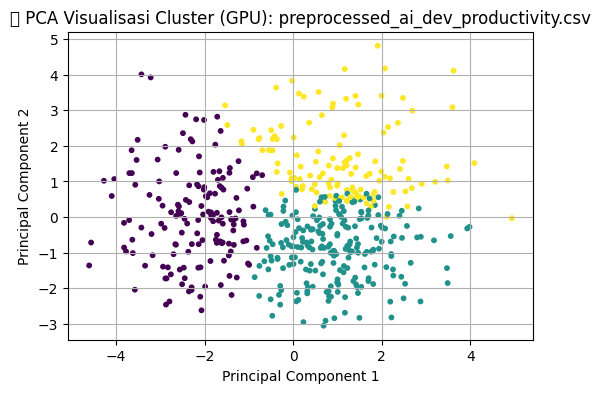

📌 PCA berhasil dilakukan. Visualisasi menunjukkan 3 cluster.
📊 Komponen utama menjelaskan: 35.86% & 23.72% dari variansi total.
✅ Proses berhasil untuk: preprocessed_ai_dev_productivity.csv

🔎 Interpretasi Clustering GPU: preprocessed_SalesDataset.csv


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


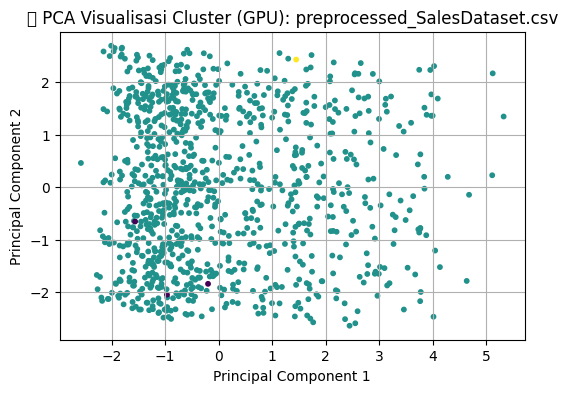

📌 PCA berhasil dilakukan. Visualisasi menunjukkan 3 cluster.
📊 Komponen utama menjelaskan: 0.69% & 0.59% dari variansi total.
✅ Proses berhasil untuk: preprocessed_SalesDataset.csv

🔎 Interpretasi Clustering GPU: preprocessed_Sleep_health_and_lifestyle_dataset.csv


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


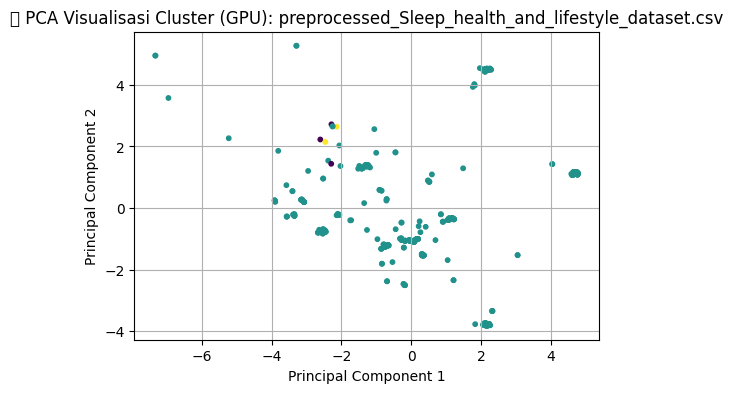

📌 PCA berhasil dilakukan. Visualisasi menunjukkan 3 cluster.
📊 Komponen utama menjelaskan: 11.57% & 9.17% dari variansi total.
✅ Proses berhasil untuk: preprocessed_Sleep_health_and_lifestyle_dataset.csv

🔎 Interpretasi Clustering GPU: preprocessed_avocado_ripeness_dataset.csv


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


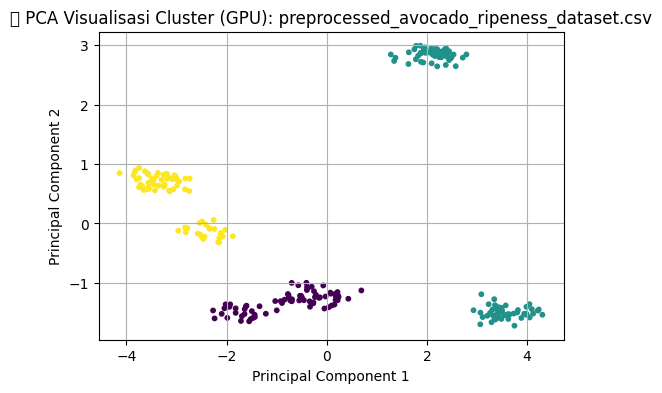

📌 PCA berhasil dilakukan. Visualisasi menunjukkan 3 cluster.
📊 Komponen utama menjelaskan: 47.75% & 19.34% dari variansi total.
✅ Proses berhasil untuk: preprocessed_avocado_ripeness_dataset.csv

🔎 Interpretasi Clustering GPU: preprocessed_top_100_saas_companies_2025.csv


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


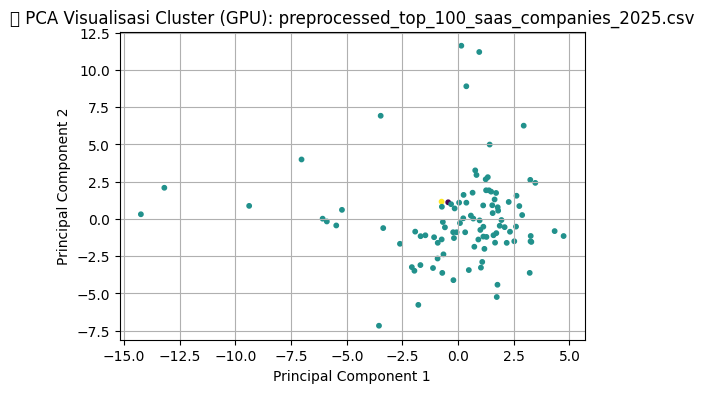

📌 PCA berhasil dilakukan. Visualisasi menunjukkan 3 cluster.
📊 Komponen utama menjelaskan: 1.38% & 1.25% dari variansi total.
✅ Proses berhasil untuk: preprocessed_top_100_saas_companies_2025.csv


In [ ]:
# 📌 Step 6: Interpretasi + Visualisasi PCA (hasil dari GPU)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print("===== 📌 Step 6: Interpretasi + Visualisasi PCA Hasil GPU =====")

for file_name, df in loaded_datasets.items():
    print(f"\n🔎 Interpretasi Clustering GPU: {file_name}")

    X = df.values

    # Jalankan clustering GPU kembali (untuk PCA labelnya)
    kmeans_gpu = cuKMeans(n_clusters=3, random_state=42)
    labels_gpu = kmeans_gpu.fit_predict(X)

    # PCA ke 2 dimensi
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Visualisasi
    plt.figure(figsize=(6, 4))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_gpu, cmap='viridis', s=10)
    plt.title(f'🌀 PCA Visualisasi Cluster (GPU): {file_name}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

    # Penjelasan tertulis
    print(f"📌 PCA berhasil dilakukan. Visualisasi menunjukkan 3 cluster.")
    print(f"📊 Komponen utama menjelaskan: {pca.explained_variance_ratio_[0]:.2%} & {pca.explained_variance_ratio_[1]:.2%} dari variansi total.")
    print(f"✅ Proses berhasil untuk: {file_name}")


In [ ]:
from sklearn.utils import resample
from sklearn.metrics import silhouette_score
from scipy.stats import ttest_rel
import numpy as np

print("===== 📌 Step 7: Significance Test Per Dataset (Bootstrapped) =====")

n_bootstrap = 30  # jumlah iterasi bootstrap
alpha = 0.05
result_sig = []

for file_name, df in loaded_datasets.items():
    print(f"\n📂 Dataset: {file_name}")
    X = df.values

    # Tentukan k_opt dulu
    k_opt = cari_cluster_optimal(X, max_k=10, show_plot=False)

    # Simpan semua skor dari bootstrap
    scores_cpu = []
    scores_gpu = []

    for _ in range(n_bootstrap):
        # Ambil sample acak dari data (dengan pengembalian)
        X_sample = resample(X, replace=True, n_samples=int(len(X) * 0.8), random_state=None)

        # Clustering CPU
        model_cpu = KMeans(n_clusters=k_opt, random_state=42)
        label_cpu = model_cpu.fit_predict(X_sample)
        score_cpu = silhouette_score(X_sample, label_cpu)
        scores_cpu.append(score_cpu)

        # Clustering GPU
        model_gpu = cuKMeans(n_clusters=k_opt, random_state=42)
        label_gpu = model_gpu.fit_predict(X_sample)
        score_gpu = silhouette_score(X_sample, label_gpu)
        scores_gpu.append(score_gpu)

    # Uji t dua sampel berpasangan
    t_stat, p_val = ttest_rel(scores_cpu, scores_gpu)

    if p_val < alpha:
        signif = "✅ SIGNIFIKAN"
    else:
        signif = "⚠️ TIDAK signifikan"

    print(f"→ t = {t_stat:.4f}, p = {p_val:.4f} → {signif}")

    result_sig.append({
        "Dataset": file_name,
        "K Optimal": k_opt,
        "t-Stat": round(t_stat, 4),
        "p-Value": round(p_val, 4),
        "Kesimpulan": signif
    })


===== 📌 Step 7: Significance Test Per Dataset (Bootstrapped) =====

📂 Dataset: preprocessed_ai_dev_productivity.csv
✅ K optimal untuk dataset ini: 2


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  retur

→ t = -0.6401, p = 0.5271 → ⚠️ TIDAK signifikan

📂 Dataset: preprocessed_SalesDataset.csv
✅ K optimal untuk dataset ini: 2


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  retur

→ t = -2.4432, p = 0.0209 → ✅ SIGNIFIKAN

📂 Dataset: preprocessed_Sleep_health_and_lifestyle_dataset.csv
✅ K optimal untuk dataset ini: 10


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  retur

→ t = 5.6956, p = 0.0000 → ✅ SIGNIFIKAN

📂 Dataset: preprocessed_avocado_ripeness_dataset.csv
✅ K optimal untuk dataset ini: 6


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  retur

→ t = -1.2442, p = 0.2234 → ⚠️ TIDAK signifikan

📂 Dataset: preprocessed_top_100_saas_companies_2025.csv
✅ K optimal untuk dataset ini: 3


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  retur

→ t = 3.2000, p = 0.0033 → ✅ SIGNIFIKAN


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)


In [ ]:
# Tampilkan hasilnya sebagai tabel
hasil_signif_df = pd.DataFrame(result_sig)
print("\n===== 📊 Hasil Significance Test per Dataset =====")
display(hasil_signif_df)



===== 📊 Hasil Significance Test per Dataset =====


,Dataset,K Optimal,t-Stat,p-Value,Kesimpulan
0,preprocessed_ai_dev_productivity.csv,2,-0.6401,0.5271,⚠️ TIDAK signifikan
1,preprocessed_SalesDataset.csv,2,-2.4432,0.0209,✅ SIGNIFIKAN
2,preprocessed_Sleep_health_and_lifestyle_datase...,10,5.6956,0.0000,✅ SIGNIFIKAN
3,preprocessed_avocado_ripeness_dataset.csv,6,-1.2442,0.2234,⚠️ TIDAK signifikan
4,preprocessed_top_100_saas_companies_2025.csv,3,3.2000,0.0033,✅ SIGNIFIKAN
